Bu derste amacımız araçların çeşitli özellikleri ve fiyatını içeren bir veri kümesi üzerinden özellikler arasındaki ilişkileri incelemek. Veri içerisinde Nan değerler içeriyor. Önce Nan değerlerden kurtulmak için bazı işlemler yapacağız (silme veya yerine değer atama). Daha sonra veri normalizasyonuna örnek göreceğiz. Bunu takiben özellikler arasında ilişkileri incelemek için sık kullanılan bazı yöntemleri ele alacağız.

Kaynak: https://www.coursera.org/learn/data-analysis-with-python

In [0]:
import pandas as pd
import numpy as np

# Verinin yüklenmesi ve ilk inceleme

Veri hakkında bilgi için bakınız: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/  veya http://archive.ics.uci.edu/ml/datasets/automobile
Kolon isimleri ve anlamları:
https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names

Symboling: risk faktörü (3 riskli, -3 güvenli), normalized-losses: araca yılda yapılan harcama, curb-weight: yüklü bir aracın ağırlığı, bore: silindir çapı, stroke: piston hareketiyle ilgili bir büyüklük, compression ratio: yakıtın püskürtülürken ne kadar sıkıştırıldığıyla ilgili bir büyüklük

Okutacağımız veri tablosu, ilk satırında kolon isimlerini taşımıyor, bu sebeple hiç başlık bilgisi olmadığını belirterek (header = None) okutalım:

In [0]:
#İlk satırında kolon isimleri içermeyen verinin okunması 
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data', header = None)
#data = pd.read_csv('../veri/arabaFiyati/imports-85.data', header = None)

Kolon isimlerini veriyi açıklayan bilgiler içerisinde tanımlandığı şekliyle atayalım:

In [0]:
#Veri tanım dosyalarında belirtilen kolonların atanması
cols = ['symboling','normalized-losses','make','fuel-type','aspiration',
        'num-of-doors','body-style','drive-wheels','engine-location',
        'wheel-base','length','width', 'height', 'curb-weight','engine-type',
        'num-of-cylinders','engine-size','fuel-system','bore','stroke',
        'compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg',
       'price']
data.columns = cols

İlk olarak veriye göz atmak faydalı olacağı için şu metodlarla elde edilen çıktıları inceleyiniz:


*   data.head()
*   data.describe()
*   data.info()


In [4]:
data.head(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


**Gözlem:** NaN değerler ? ile temsil edilmiş. Price içerisinde de NaN değer var (örnek: 9 endeksli satır)

In [6]:
round(data.describe(),2)#her özelliğin hangi aralıklarda değerleri olduğunu incelemek için faydalı, sayısal değerler içeren özellikler için değerleri verecektir

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,0.83,98.76,174.05,65.91,53.72,2555.57,126.91,10.14,25.22,30.75
std,1.25,6.02,12.34,2.15,2.44,520.68,41.64,3.97,6.54,6.89
min,-2.00,86.60,141.10,60.30,47.80,1488.00,61.00,7.00,13.00,16.00
25%,0.00,94.50,166.30,64.10,52.00,2145.00,97.00,8.60,19.00,25.00
50%,1.00,97.00,173.20,65.50,54.10,2414.00,120.00,9.00,24.00,30.00
75%,2.00,102.40,183.10,66.90,55.50,2935.00,141.00,9.40,30.00,34.00
max,3.00,120.90,208.10,72.30,59.80,4066.00,326.00,23.00,49.00,54.00


**Gözlemler:** araba genişliği 60.30-72.30 arasında olup çok az değişen, standartlaşmış bir değer gibi görünüyor. Yükseklik de benzer durumda. Değerlerin çoğunun standart sapması ortalama değere göre düşük 

In [7]:
round(data.describe(include='all'),2)#değerleri sayısal olmayan özellikleri içerecek şekilde işletebiliriz

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.00,205,205,205,205,205,205,205,205,205.00,205.00,205.00,205.00,205.00,205,205,205.00,205,205,205,205.00,205,205,205.00,205.00,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,NaN,NaN,NaN,NaN,148,159,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.76,174.05,65.91,53.72,2555.57,NaN,NaN,126.91,NaN,NaN,NaN,10.14,NaN,NaN,25.22,30.75,NaN
std,1.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.02,12.34,2.15,2.44,520.68,NaN,NaN,41.64,NaN,NaN,NaN,3.97,NaN,NaN,6.54,6.89,NaN
min,-2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.60,141.10,60.30,47.80,1488.00,NaN,NaN,61.00,NaN,NaN,NaN,7.00,NaN,NaN,13.00,16.00,NaN
25%,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.50,166.30,64.10,52.00,2145.00,NaN,NaN,97.00,NaN,NaN,NaN,8.60,NaN,NaN,19.00,25.00,NaN
50%,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.00,173.20,65.50,54.10,2414.00,NaN,NaN,120.00,NaN,NaN,NaN,9.00,NaN,NaN,24.00,30.00,NaN
75%,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.40,183.10,66.90,55.50,2935.00,NaN,NaN,141.00,NaN,NaN,NaN,9.40,NaN,NaN,30.00,34.00,NaN


**Gözlemler:** kategorik öğeler içeren çok sayıda kolon var, istatistiksel değerleri NaN olarak gösterilmiş. Bazı kolonda en sık gözlenen değerin(top) frekansı toplam veri sayısına üçte birinden az, bu özellikler çeşitlilik içeriyor olabilir. Bazı özelliklerde ise (örneğin engine-location) verinin neredeyse tümünde (202/205) aynı değeri almış(front). Bu veri pek çeşitlilik içermiyor.

# Veri temizleme ve düzenleme

İlk olarak eksik verilerle ne yapacağımıza karar vermemiz lazım. Eksik veriler için farklı stratejiler uygulanabilir:
*   1) veri satırı (örneği) silme [verinin bol olduğu durum]
*   2) eksik değere o kolondaki ortalama değeri atama [verinin az, verideki standart sapmanın düşük olduğu durum]
*   3) eksik değere o kolonda en sık geçen değeri atama [kategorik veriler için uygun]

## Nan değerlerin düzenlenmesi

NaN(np.nan) değerler için uygulayabileceğimiz hazır fonksiyonlar var, öncelikle ilgili ifadeleri NaN(np.nan) ile değiştirme işlemlerini yapabiliriz. Bu veri içerisinde ? olarak temsil edilmişler

In [0]:
data.replace({'?': np.nan}, inplace = True)

İçinde NaN olan kolonları bulalım. Önce kolon bazında yapacağımız kontrolün çıktısına bakalım

In [9]:
data.isnull().any()

symboling            False
normalized-losses     True
make                 False
fuel-type            False
aspiration           False
num-of-doors          True
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                  True
stroke                True
compression-ratio    False
horsepower            True
peak-rpm              True
city-mpg             False
highway-mpg          False
price                 True
dtype: bool

Bu çıktıyı "boolean mask" olarak kullanabiliriz

In [10]:
NaN_icerenler = data.columns[data.isnull().any()]#.any(): bir seride en az bir doğru var ise doğru, hepsi yanlış ise yanlış döndürür
NaN_icerenler

Index(['normalized-losses', 'num-of-doors', 'bore', 'stroke', 'horsepower',
       'peak-rpm', 'price'],
      dtype='object')

Herhangi bir kolonda kaç adet NaN değeri var? Örnek olarak "price" kolonuna bakalım

In [11]:
data['price'].isnull().value_counts()

False    201
True       4
Name: price, dtype: int64

**Nan değerlerine uygulayabileceğimiz işlemler:**

**1) İlgili satırı silme**
Price kolonu içerisinde NaN değeri alan satırları silelim. Çünkü price bizim için ana hedef verisi, ona gürültü eklememek iyi olur.

In [13]:
print("Silme işlemi öncesinde boyutlar",data.shape)
data.dropna(subset = ['price'], axis = 0, inplace = True)# axis = 0: satır, axis = 1: kolon
print("Silme işlemi sonrasında boyutlar",data.shape)

Silme işlemi öncesinde boyutlar (201, 26)
Silme işlemi sonrasında boyutlar (201, 26)


Diğer NaN içeren kolonları inceleyelim

In [14]:
NaN_iceren_kolonlar = data.columns[data.isnull().any()]
data[NaN_iceren_kolonlar].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 6 columns):
normalized-losses    164 non-null object
num-of-doors         199 non-null object
bore                 197 non-null object
stroke               197 non-null object
horsepower           199 non-null object
peak-rpm             199 non-null object
dtypes: object(6)
memory usage: 11.0+ KB


**Gözlem:** sayısal değerlerle ifade edilmesi uygun olan veriler string olarak depolanmış, öncelikle sayısal değerlere dönüştürmeliyiz. num-of-doors'u ayrıca ele almalıyız, öncelikle onun içerdiği değerlerin neler olduğuna bakabiliriz

In [15]:
data['num-of-doors'].value_counts()

four    113
two      86
Name: num-of-doors, dtype: int64

"Unique" değerlerin 2 tane olduğunu görüyoruz: "two" ve "four". Bu iki değeri de sayıya dönüştürecek opsiyon ekleyerek dönüşüm fonksiyonu yazabiliriz

In [0]:
#NaN değerler dışındakileri sayıya dönüştüren bir fonksiyon yazıp verilere uygulayalım
def sayiya_donusturucu(s):
  if s == np.nan:
    return s
  elif isinstance(s,str):
    if s.strip() == 'two':
      return 2
    elif s.strip() == 'four':
      return 4
    else:
      return float(s)
  else:
    return s
  
for kolon in NaN_iceren_kolonlar:
  data[kolon] = data[kolon].apply(sayiya_donusturucu)


Dönüştürme sonrası verilerin dağılımına bakalım. Amacımız NaN değerleri ne yapacağımızıa karar vermek

In [18]:
data[NaN_iceren_kolonlar].describe()

,normalized-losses,num-of-doors,bore,stroke,horsepower,peak-rpm
count,164.000000,199.000000,197.000000,197.000000,199.000000,199.000000
mean,122.000000,3.135678,3.330711,3.256904,103.396985,5117.587940
std,35.442168,0.993252,0.270793,0.319256,37.553843,480.521824
min,65.000000,2.000000,2.540000,2.070000,48.000000,4150.000000
25%,94.000000,2.000000,3.150000,3.110000,70.000000,4800.000000
50%,115.000000,4.000000,3.310000,3.290000,95.000000,5200.000000
75%,150.000000,4.000000,3.590000,3.410000,116.000000,5500.000000
max,256.000000,4.000000,3.940000,4.170000,262.000000,6600.000000


**Gözlem:** Bore std değeri ortalama değere göre düşük ve bu özellik 2.54 ile 3.94 arasında bir değer alıyor. NaN olan Bore değerlerini ortalamaya eşleyebiliriz. Önce bore'un  NaN değeri aldığı satırları görelim

In [19]:
nan_endeksler = data['bore'].isnull()
data[nan_endeksler]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,150.0,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945
56,3,150.0,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845
57,3,150.0,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,two,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645
58,3,150.0,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,two,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645


**2) NaN değeri ortalama değere eşleme**

In [0]:
data['bore'].replace(np.nan,data['bore'].mean(),inplace = True)

"stroke" ve "normalized-losses" için de durum benzer, onların da NaN değerlerini ortalama değeriyle değiştirelim

In [0]:
data['stroke'].replace(np.nan,data['stroke'].mean(),inplace = True)
data['normalized-losses'].replace(np.nan,data['normalized-losses'].mean(),inplace = True)


**3) NaN değeri en sık kullanılan değere eşleme**


Araç kapı sayısı için ortalama değer kullanmak yanlış olur, en sık kullanılan değere eşleyebiliriz

In [22]:
nan_endeksler = data['num-of-doors'].isnull()
data['num-of-doors'].replace(np.nan,data['num-of-doors'].median(),inplace = True)
data[nan_endeksler]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148.0,dodge,gas,turbo,4.0,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,four,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558
63,0,122.0,mazda,diesel,std,4.0,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,four,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795


In [23]:
round(data.describe(),2)

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
count,201.00,201.0,201.00,201.00,201.00,201.00,201.00,201.00,201.00,201.00,201.00,201.00,199.00,199.00,201.00,201.00
mean,0.84,122.0,3.14,98.80,174.20,65.89,53.77,2555.67,126.88,3.33,3.26,10.16,103.40,5117.59,25.18,30.69
std,1.25,32.0,0.99,6.07,12.32,2.10,2.45,517.30,41.55,0.27,0.32,4.00,37.55,480.52,6.42,6.82
min,-2.00,65.0,2.00,86.60,141.10,60.30,47.80,1488.00,61.00,2.54,2.07,7.00,48.00,4150.00,13.00,16.00
25%,0.00,101.0,2.00,94.50,166.80,64.10,52.00,2169.00,98.00,3.15,3.11,8.60,70.00,4800.00,19.00,25.00
50%,1.00,122.0,4.00,97.00,173.20,65.50,54.10,2414.00,120.00,3.31,3.29,9.00,95.00,5200.00,24.00,30.00
75%,2.00,137.0,4.00,102.40,183.50,66.60,55.50,2926.00,141.00,3.58,3.41,9.40,116.00,5500.00,30.00,34.00
max,3.00,256.0,4.00,120.90,208.10,72.00,59.80,4066.00,326.00,3.94,4.17,23.00,262.00,6600.00,49.00,54.00


NaN içeren diğer (kalan) kolonlar

In [24]:
NaN_iceren_kolonlar = data.columns[data.isnull().any()]
NaN_iceren_kolonlar

Index(['horsepower', 'peak-rpm'], dtype='object')

Bu iki özellik için Nan sayısı 2 ile sınırlı, bunların bulunduğu satırları atarak temizleme işimizi tamamlayabiliriz

In [25]:
print("Silme işlemi öncesinde boyutlar",data.shape)
for ozellik in NaN_iceren_kolonlar:
  data.dropna(subset = [ozellik], axis = 0, inplace = True)
print("Silme işlemi sonrasında boyutlar",data.shape)

Silme işlemi öncesinde boyutlar (201, 26)
Silme işlemi sonrasında boyutlar (199, 26)


Başka Nan içeren özellik kalmamış olmalı

In [27]:
data.isnull().sum().sum()

0

## Kolon verilerine uygulanan dönüştürme işlemleri

mpg: "miles per galon" içeren özellikleri(city-mpg, highway-mpg) 100 kilometrede harcanan litre'ye dönüştürmek istebiliriz

In [28]:
data.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,122.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500


In [29]:
data['city-mpg']= 235 / data['city-mpg']
data.rename(columns = {'city-mpg':'city-L/100km'},inplace=True)
data['highway-mpg']= 235 / data['highway-mpg']
data.rename(columns = {'highway-mpg':'highway-L/100km'},inplace=True)
data.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
0,3,122.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,13495
1,3,122.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,16500


Veri türlerimizi kontrol edelim

In [30]:
data.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors         float64
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-L/100km         float64
highway-L/100km      float64
price                 object
dtype: object

Silindir sayısı tam sayı olsa daha doğru, hangi değerlerin kullanıldığına bakalım

In [31]:
data["num-of-cylinders"].value_counts()

four      155
six        24
five       10
two         4
eight       4
twelve      1
three       1
Name: num-of-cylinders, dtype: int64

In [33]:
#Sayı dönüştürücümüzü değiştirerek kullanalım
def sayiya_donusturucu2(s):
  if s == np.nan:
    return s
  elif isinstance(s,str):
    if s.strip() == 'two':
      return 2
    elif s.strip() == 'three':
      return 3
    elif s.strip() == 'four':
      return 4
    elif s.strip() == 'five':
      return 5
    elif s.strip() == 'six':
      return 6
    elif s.strip() == 'eight':
      return 8
    elif s.strip() == 'twelve':
      return 12
    else:
      return float(s)
  else:
    return s
  

data["num-of-cylinders"] = data["num-of-cylinders"].apply(sayiya_donusturucu2)
data["num-of-cylinders"] = data["num-of-cylinders"].astype("int")
data["num-of-cylinders"].value_counts()

4     155
6      24
5      10
8       4
2       4
12      1
3       1
Name: num-of-cylinders, dtype: int64

## Normalizasyon

Ozellikleri makine öğrenmesi süreçlerinde kullanırken her bir özelliğin hangi oranda modele katıldığı önemli bir bilgidir. Bu bilginin yorumlanmasını kolaylaştıran işlemlerden birisidir. Bunun için önce özelliklerin normalize edilmesi, katkılarının birbiriyle karşılaştırılabilir büyüklüklere getirilmelidir. Ayrıca bu işlemin model eğitim sürecini kolaylaştırdığı da bilinmektedir. Örnek olması açısından length width height özelliklerini normalize edelim

Öncelikler bu kolonlardaki verilere örnek satırlar görelim

In [34]:
data[['length','width','height']].head()

,length,width,height
0,168.8,64.1,48.8
1,168.8,64.1,48.8
2,171.2,65.5,52.4
3,176.6,66.2,54.3
4,176.6,66.4,54.3


Opsiyon 1) max değere bölerek değerleri 0-1 arasına normalize etmek

In [0]:
data['length'] = data['length']/data['length'].max()

Opsiyon 2) Dinamik aralıkla(max-min) normalize etmek

In [0]:
data['width'] = (data['width']-data['width'].min())/(data['width'].max()-data['width'].min())

Opsiyon3) Z-score: ortalama değeri çıkartıp standart sapmaya bölmek

In [0]:
data['height'] = (data['height']-data['height'].mean())/data['height'].std()

Değerlerin baş kısmına tekrar bakarsak

In [38]:
data[['length','width','height']].head()

,length,width,height
0,0.811148,0.324786,-2.033429
1,0.811148,0.324786,-2.033429
2,0.822681,0.444444,-0.562263
3,0.848630,0.504274,0.214186
4,0.848630,0.521368,0.214186


## "Binning" / kategorizasyon

Bazen de sayısal değerlerden yola çıkarak alt kategoriler oluşturmak isteyebiliriz. Örnek: fiyat bilgisinden yola çıkarak fiyat kategorileri oluşturup kullanmak isteyebiliriz: low, mid, high. Bunun için önce bu kategorilerin sınırlarını tanımlamalıyız. Bunun için de öncelikle verinin dağılımına bakmak isteyebiliriz

In [39]:
data['price'].describe()

count      199
unique     184
top       5572
freq         2
Name: price, dtype: object

Fiyat string olarak tutuluyor, önce tam sayı değerlere çevirelim

In [40]:
data['price'] = data['price'].astype(int)
data['price'].describe()

count      199.000000
mean     13243.432161
std       7978.707609
min       5118.000000
25%       7775.000000
50%      10345.000000
75%      16501.500000
max      45400.000000
Name: price, dtype: float64

Kategori sınırlarını eşit aralıklı tanımlayabiliriz: max-min arasında birbirinden eşit uzaklıkta kategori_sayisi+1 değer oluşturalım 

In [41]:
bins = np.linspace(data['price'].min(), data['price'].max(),4)#start, stop, nums
print(bins)

[ 5118.         18545.33333333 31972.66666667 45400.        ]


In [0]:
kategoriler = ['low','mid','high']
#yeni bir kolon yaratıp bu kategorik verileri oluşturup yerleştirebiliriz
data['price-category'] = pd.cut(data['price'], bins, labels = kategoriler, include_lowest = True)

In [44]:
data[['price','price-category']].head(10)

,price,price-category
0,13495,low
1,16500,low
2,16500,low
3,13950,low
4,17450,low
5,15250,low
6,17710,low
7,18920,mid
8,23875,mid
10,16430,low


**Kategorik verinin sayıya dönüştürülmesi**

Bunun için de çeşitli opsiyonlar bulunmakta. Bunlardan birisi "One hot encoding": Örneğin "fuel-type" özelliği iki tür değer alabiliyor: "gas" ve "diesel". Bu özellik yerine, içine 0 veya 1 değeri alan "gas" ve "diesel" kolonları oluşturmak isteyebiliriz. Burada 1: var, 0: yok anlamı taşıyacak

In [46]:
data["fuel-type"].value_counts()

gas       179
diesel     20
Name: fuel-type, dtype: int64

In [0]:
data = pd.concat([data,pd.get_dummies(data['fuel-type'])], axis = 1)#get_dummies: one-hot encoding ile yeni kolonlar oluşturup 0 ve 1 değerleri yerleştirir

İki adet yeni kolon oluşturuldu

In [48]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-L/100km',
       'highway-L/100km', 'price', 'price-category', 'diesel', 'gas'],
      dtype='object')

In [49]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,price-category,diesel,gas
0,3,122.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,0.811148,0.324786,-2.033429,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,13495,low,0,1
1,3,122.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,0.811148,0.324786,-2.033429,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,16500,low,0,1
2,1,122.0,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,0.822681,0.444444,-0.562263,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154.0,5000.0,12.368421,9.038462,16500,low,0,1
3,2,164.0,audi,gas,std,4.0,sedan,fwd,front,99.8,0.848630,0.504274,0.214186,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102.0,5500.0,9.791667,7.833333,13950,low,0,1
4,2,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,0.848630,0.521368,0.214186,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115.0,5500.0,13.055556,10.681818,17450,low,0,1


# Verilerin istatistiksel incelemesi ve görselleştirilmesi

Şimdiye kadar .describe() ve .value_counts() fonksiyonlarıyla bir kolondaki veri dağılımına dair bilgiler edindik. Şimdi bazı başka opsiyonları görelim

Aşağıda bazı çizimler yaptıracağız, önce ilgili kütüphaneleri yükleyelim

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

**0) Histogram**

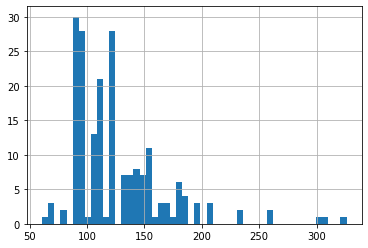

In [51]:
data['engine-size'].hist(bins=50)

Histogram çizimini verideki tüm kolonlar için (tüm dataFrame için) çizdirebiliriz

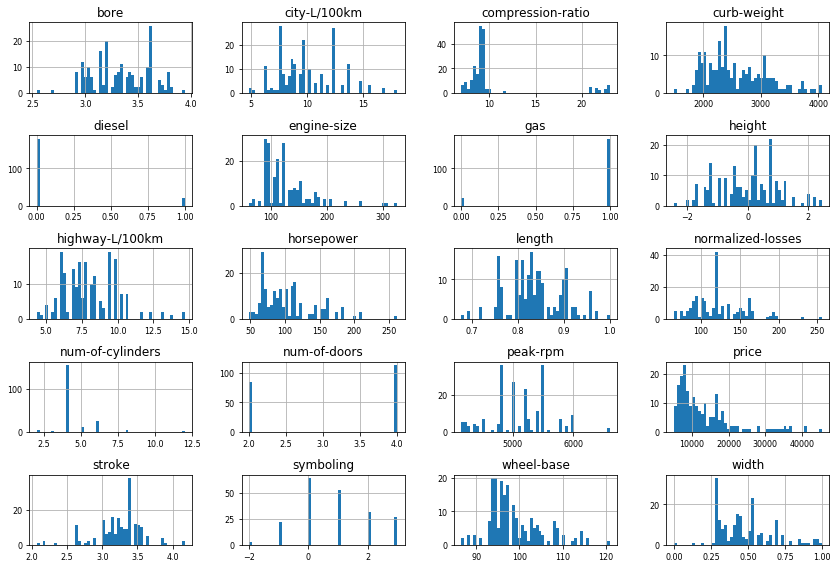

In [52]:
data.hist(bins=50, xlabelsize = 8, ylabelsize = 8)
plt.tight_layout(rect=(0, 0, 2, 2))

**1) "Box-plot"**
Bir değişkenin, bir diğerine göre dağılımını incelemek için box-plot kullanımı. "drive-wheels" kolonundaki verilerdeki kategorilerin "price" dağılımlarını görelim

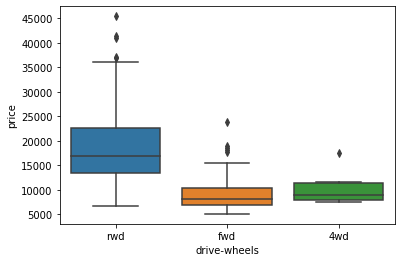

In [53]:
sns.boxplot(x = 'drive-wheels', y = 'price', data = data)

Markalara göre fiyat dağılıma bakabiliriz

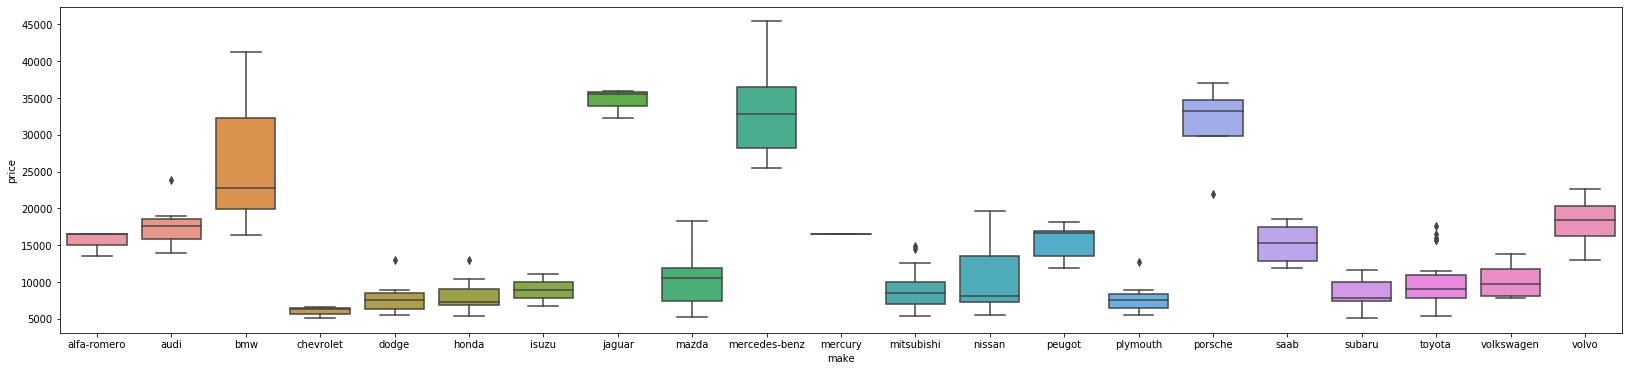

In [54]:
plt.figure(figsize=(28, 6))
sns.boxplot(x = 'make', y = 'price', data = data)

**2) Scatter plot**

Bir özelliğin diğeriyle ilişkisini incelemek için verileri bu iki özelliğin x ve y ekseninde olduğu noktalar olarak gösterebiliriz: "Scatter plot" Alttaki örnekte motor hacmi ile fiyat arasında bir ilişki olabileceği düşünülerek bir scatter-plot oluşturulmuştur

Text(0, 0.5, 'Price')

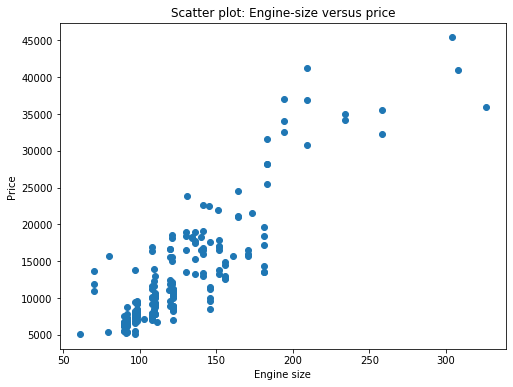

In [55]:
x = data['engine-size']
y = data['price']
plt.figure(figsize=(8, 6))
plt.scatter(x,y)
plt.title("Scatter plot: Engine-size versus price")
plt.xlabel("Engine size")
plt.ylabel("Price")

Scatter plot bir dizi özellik ikilileriyle oluşturulabilir

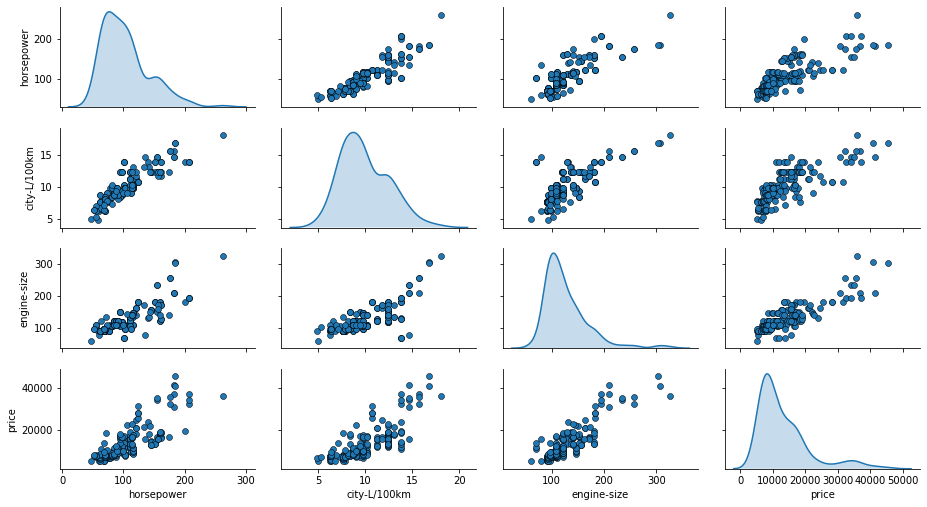

In [56]:
ozellikler = ['horsepower','city-L/100km','engine-size','price']
pp = sns.pairplot(data[ozellikler], height=1.8, aspect=1.8,plot_kws=dict(edgecolor="k", linewidth=0.5),diag_kind="kde", diag_kws=dict(shade=True))

**Gözlem:** veriler büyük oranda diyagonal üzerinde, bir özellikteki artış diğer özellikte de artışa karşılık geliyor ( örnek: motor hacmi arttıkça fiyat da artıyor)

**Kategorik veriler için scatter plot**

"body-style" özelliği 5 farklı değer almış ve string şeklinde tanımlanmış. Öncelikle kategorik veri türüne dönüştürüp daha sonra çizim kütüphanelerinde kategorik veriler için tanımlanmış fonksiyonları kullanabiliriz.

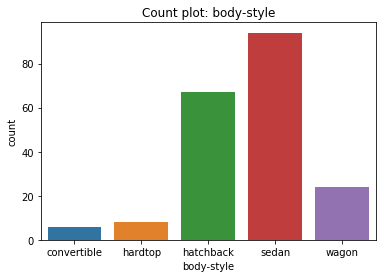

In [58]:
data["body-style"] = data["body-style"].astype('category')

#Her bir kategoriden kaçar veri olduğunu gösteren countplot
sns.countplot(x="body-style", data=data)
plt.title("Count plot: body-style");

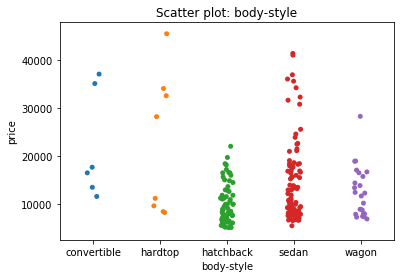

In [59]:
#Kategorilere göre scatter plot
sns.stripplot(x="body-style", y="price", data=data)
plt.title("Scatter plot: body-style");

Başka bir kategorik özelliği de görsele (renk kodu olarak) katma

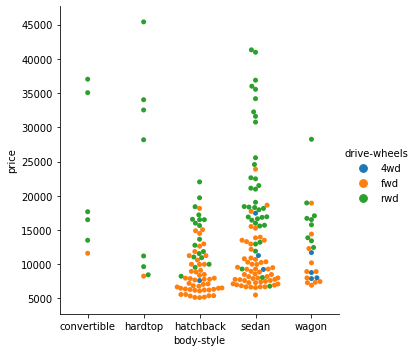

In [60]:
data["drive-wheels"]=data["drive-wheels"].astype('category')#kategorik türe dönüştürme

sns.catplot(x="body-style", y="price", hue="drive-wheels", kind="swarm", data=data);

Text(0.5, 1.0, 'Violin plot: body-style')

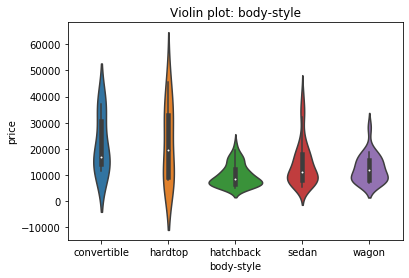

In [61]:
#Kategorilere göre dağılım grafikleri: violin plot
sns.violinplot(x="body-style", y="price", data=data)
plt.title("Violin plot: body-style")

Text(0.5, 1.0, 'Bar plot: body-style')

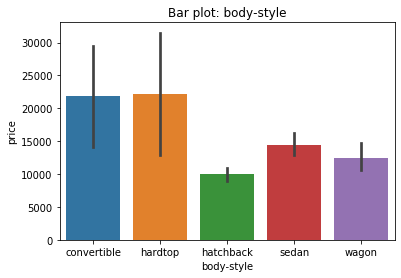

In [62]:
#Kategorilere göre dağılım grafikleri: bar plot
sns.barplot(x="body-style", y="price", data=data)
plt.title("Bar plot: body-style")

**3) Pivot tablo aracılığıyla inceleme (groupby)**

drive-wheels ve body-type kombinasyonları için fiyatı incelemek istediğimizi düşünelim. Şunu görebilmek istiyoruz: 4wd-hatchback, 4wd-sedan,...rwd-hatchback, rwd-sedan,... gibi kombinasyonlarda ortalama fiyat nedir?

In [63]:
data_sub = data[['drive-wheels','body-style','price']]#verinin ilgili kolonlarını alalım
data_group = data_sub.groupby(['drive-wheels','body-style'], as_index = False).mean()#ilk iki özellik cinsinden gruplayıp üçüncü değişkenin ortalama değerine bakalım
data_group

,drive-wheels,body-style,price
0,4wd,convertible,NaN
1,4wd,hardtop,NaN
2,4wd,hatchback,7603.000000
3,4wd,sedan,12647.333333
4,4wd,wagon,9095.750000
5,fwd,convertible,11595.000000
6,fwd,hardtop,8249.000000
7,fwd,hatchback,8365.166667
8,fwd,sedan,9811.800000
9,fwd,wagon,10061.181818


Pivot tablosu oluşturarak bir özelliği kolon, bir özelliği satıra koyarak daha kolay okunur bir tablo oluşturabiliriz

In [64]:
data_pivot = data_group.pivot(index = 'body-style', columns = 'drive-wheels')
data_pivot

price                            
drive-wheels           4wd           fwd           rwd
body-style                                            
convertible            NaN  11595.000000  23949.600000
hardtop                NaN   8249.000000  24202.714286
hatchback      7603.000000   8365.166667  14337.777778
sedan         12647.333333   9811.800000  21711.833333
wagon          9095.750000  10061.181818  16994.222222

**4) Korelasyon**

Özelliklerin beraber değişimine dair bir ölçüt olarak korelasyonu inceleyebiliriz. Örneğin aracın beygir gücü ile fiyatı arasıda ilişki var mı incelemek isteyebiliriz

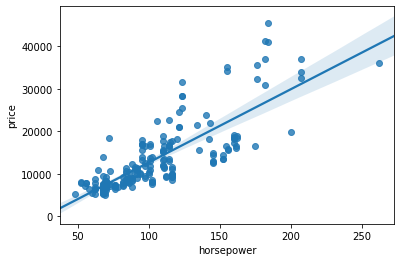

In [66]:
sns.regplot(x='horsepower',y='price',data=data);

**Gözlem:** bulunan eğri pozitif: korelasyon pozitif, beygir gücü artarken, fiyat da artıyor. 

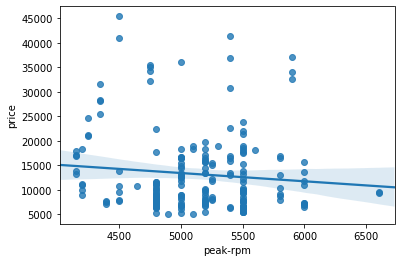

In [68]:
sns.regplot(x='peak-rpm',y='price',data=data);

**Gözlem:** bu özellik için korelasyon düşük. Fiyat ile peak-rpm arasındaki ilişki zayıf

Bütün özelliklerin birbiriyle ilişkisini incelemek de mümkün

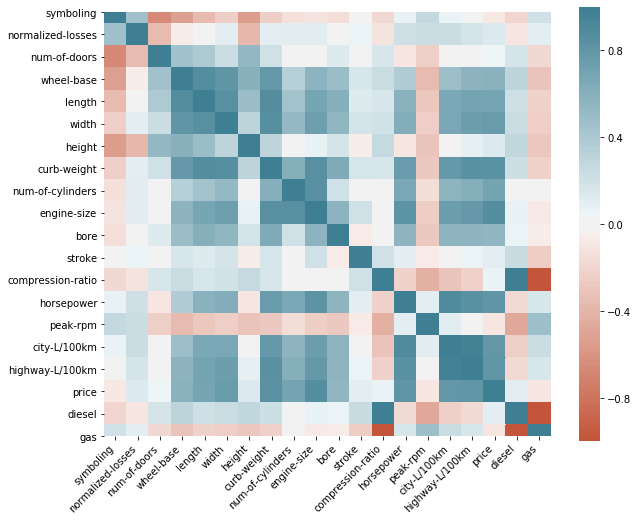

In [69]:
corr = data.corr()
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');

# Özellikler ile fiyat arasındaki ilişkiyi modelleme

Burada örnek olarak özelliklerle fiyat arasında basit doğrusal modeller kurmaya çalışacağız. Bunun için sklearn kütüphanesini kullanalım. Öncelikle fiyatla ilişkisinin güçlü olduğunu bildiğimiz "horsepower" özelliği ile fiyat arasındaki ilişki için doğrusal bir model kuralım

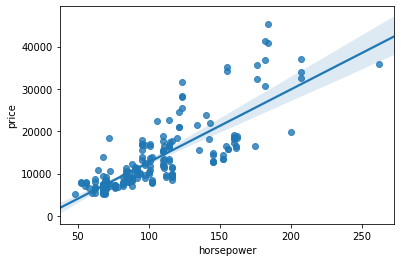

In [71]:
#hatırlama amaçlı tekrar-çizim
sns.regplot(x='horsepower',y='price',data=data);

In [73]:
#Doğrusal modelleme
from sklearn.linear_model import LinearRegression#kütüphaneyi yükleme
lr = LinearRegression()#obje oluşturma

#özellikleri ve özelliklerle kestireceğimiz hedeflenen değeri belirleyelim
y = data['price']#hedef, series
x = data[['horsepower']]#kullanılacak özellik, dataFrame 
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
print("Kurulan model:")
print(' y = ',lr.intercept_, ' + ',lr.coef_[0], 'x')  
print(' fiyat = ',lr.intercept_, ' + ',lr.coef_[0], ' * beygir_gucu')  

Kurulan model:
 y =  -4562.1749956674885  +  172.20625117310607 x
 fiyat =  -4562.1749956674885  +  172.20625117310607  * beygir_gucu


**Multiple linear regression**

Birden fazla özellik ile fiyat arasındaki ilişkiyi modelleyelim. 

In [75]:
ozellikler = data[['horsepower','curb-weight','engine-size','highway-L/100km']]
lr.fit(ozellikler,data['price'])#ozellikler ile fiyat arasında ilişkinin doğrusal model parametrelerinin hesaplanması

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
print("Kurulan model:")
print(' fiyat = ',lr.intercept_, ' + ',lr.coef_[0], ' * horsepower',
     ' + ',lr.coef_[1], ' * curb-weight',
     ' + ',lr.coef_[2], ' * engine-size',
     ' + ',lr.coef_[2], ' * highway-L/100km'
     ) 

Kurulan model:
 fiyat =  -14285.462035057442  +  37.0551879545348  * horsepower  +  3.503072884687459  * curb-weight  +  85.95034797421097  * engine-size  +  85.95034797421097  * highway-L/100km


Verimizin ilk 5 satırındaki özellikleri ve modeli kullanarak fiyatı tahmin edelim (Dikkat: amacımız bir makine öğrenmesi modeli testi olduğunda bu örnekleri dışarıda bırakarak eğitim yapmalıydık. Burada amacımız gerçek bir test değil, bu sebeple kodun sade olduğu bir örnek tercih edildi):

In [78]:
kestirilen_fiyatlar = lr.predict(ozellikler[:5])
print('Kestirilen fiyatlar: ',np.round(kestirilen_fiyatlar))
print('Gerçek değerler: ', np.array(data['price'])[:5])

Kestirilen fiyatlar:  [14082. 14082. 18690. 10789. 16657.]
Gerçek değerler:  [13495 16500 16500 13950 17450]


Kestirimlerimiz ile gerçek değer arasındaki farkı incelemek faydalı olacaktır. Bunun için hatanın görselleştirilmesi (residual-plot) yöntemini kullanabiliriz. Seaborn kütüphanesinin residual-plot fonksiyonu doğrusal modeli bulup daha sonra kestirimdeki hataları görselleştirir

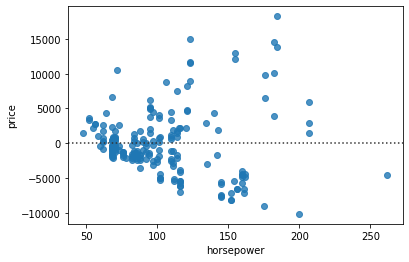

In [79]:
sns.residplot(data['horsepower'],data['price'])#y ekseni fiyatın kestirimindeki hatayı gösterir

**Gözlem:** beygirgücü arttıkça hata da artıyor, fiyat-beygirgücü ilişkisi doğrusal olmayabilir. Doğrusal olsa idi rastgele dağılım görmeyi beklerdik

Hatanın scatter-plot'u yerine dağılımını çizdirmek de hatanın doğasını anlamamıza yardımcı olabilir.
İlk olarak tek özellikle kestirimi ele alalım

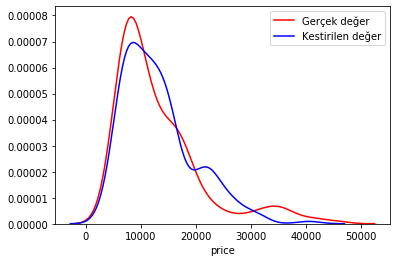

In [89]:
#House-power vs price ilişkisini tekrar modelleyelim
y = data['price']#hedef, series
x = data[['horsepower']]#kullanılacak özellik, dataFrame 
lr.fit(x,y)#modelin hesaplanması
y_kestirilen = lr.predict(x)#modelle mözellikten kestirim yapılması
#Gerçek ve kestirilen değerlerin dağılımlarının çizimi
ax1 = sns.distplot(data['price'],hist=False,color='r',label='Gerçek değer')
sns.distplot(y_kestirilen,hist=False,color='b',label='Kestirilen değer',ax=ax1)

İkinci olarak birden fazla özelik içeren modellemeyi ele alalım

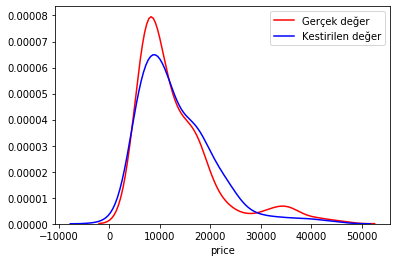

In [90]:
#House-power vs price ilişkisini tekrar modelleyelim
y = data['price']#hedef, series
x = data[['horsepower','curb-weight','engine-size','highway-L/100km']]#kullanılacak özellikler, dataFrame 
lr.fit(x,y)#modelin hesaplanması
y_kestirilen = lr.predict(x)#modelle mözellikten kestirim yapılması
#Gerçek ve kestirilen değerlerin dağılımlarının çizimi
ax1 = sns.distplot(data['price'],hist=False,color='r',label='Gerçek değer')
sns.distplot(y_kestirilen,hist=False,color='b',label='Kestirilen değer',ax=ax1)

Gözlem: Birden fazla özellik kullanıldığında hata azaldı

**! buraya kadar gördüğümüz örnekte modeli oluşturmak için kullandığımız veri üzerinde test yapmaya çalıştık. Oysa modelin testi daha önce hiç karşılaşmadığı veri üzerinde yapılmalı. Bu konuyu makine öğrenmesi derslerinde detaylı ele alacağız.**